In [1]:
cd /orange/adamginsburg/salt/maud/

/orange/adamginsburg/salt/maud


In [2]:
ls spectra

figures/                           G17_SPW2_2017.image_meanspec.fits
G17_SPW0_2017.image_meanspec.fits  G17_SPW2_2017.image_stack.fits
G17_SPW0_2017.image_stack.fits     G17_SPW3_2017.image_meanspec.fits
G17_SPW1_2017.image_meanspec.fits  G17_SPW3_2017.image_stack.fits
G17_SPW1_2017.image_stack.fits     NaCl_v_le_3_stackcube_meanspec.fits


In [3]:
import socket
socket.gethostname()

'c23b-s27.ufhpc'

In [4]:
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis/')

In [5]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2b7c9c242280>

In [6]:
doplot=True

In [7]:
%run -i /orange/adamginsburg/salt/code/line_fitting_G17.py

7.041616963041559e-05


8.408429043875389e-05
6.977591415355421e-05


5.601097908302747e-05


1 matches for NaCl


Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior


1 matches for Na37Cl
4 matches for KCl
0 matches for K37Cl
1 matches for 41KCl
0 matches for 41K37Cl
{}


Mean of empty slice.
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in true_divide
invalid value encountered in double_scalars


Measured 35/37Cl abundance = nan +/- nan


In [9]:
paths.fpath('spectral_fits')

'/orange/adamginsburg/salt/figures/spectral_fits'

In [10]:
ls /orange/adamginsburg/salt/figures/spectral_fits

23Na-35Clv=1-1 J=18-17_2_232.50997700000002 GHz.png
23Na-35Clv=2-2 J=17-16_0_217.980231 GHz.png
23Na-37Clv=5-5 J=19-18_3_233.16920199999998 GHz.png
39K-35Clv=3-3 J=29-28_0_218.57970759934983 GHz.png
39K-35Clv=3-3 J=31-30_3_233.60569798423805 GHz.png
39K-35Clv=4-4 J=29-28_0_217.22891175712175 GHz.png
39K-35Clv=4-4 J=31-30_2_232.16184645668199 GHz.png
41K-35Clv=0-0 J=29-28_0_217.54316883063962 GHz.png
gallery.html
style.css


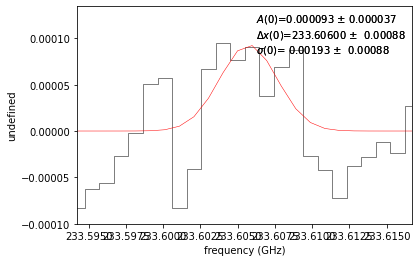

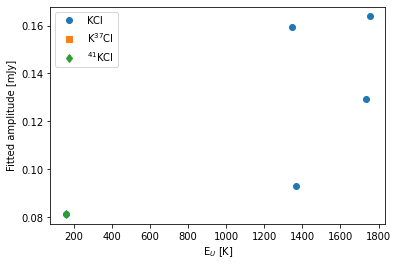

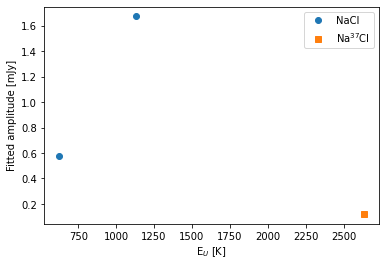

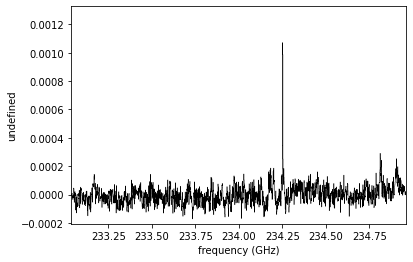

In [15]:
sp.plotter()

ValueError: attempt to get argmin of an empty sequence

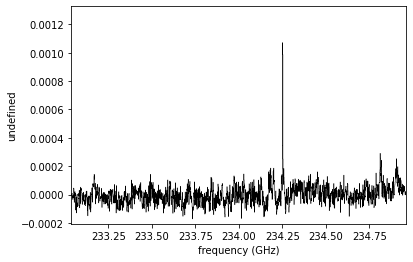

In [19]:
sp.plotter(figure=pl.gcf())
slc.specfit()
slc.specfit.plot_fit(ax=sp.plotter.axis)